## Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.


Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exploration.
Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
Use SQLAlchemy create_engine to connect to your sqlite database.
Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.



Precipitation Analysis


Design a query to retrieve the last 12 months of precipitation data.
Select only the date and prcp values.
Load the query results into a Pandas DataFrame and set the index to the date column.
Plot the results using the DataFrame plot method.




In [1]:

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
import pandas as pd
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
import numpy as np





In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
inspector = inspect(engine)
inspector.get_table_names()




['measurements', 'station']

In [3]:
engine.execute('SELECT station, cast(date as datetime) as "date", prcp, tobs  FROM measurements limit 5').fetchall()


[('USC00519397', 2010, 0.08, 65),
 ('USC00519397', 2010, 0.0, 63),
 ('USC00519397', 2010, 0.0, 74),
 ('USC00519397', 2010, 0.0, 76),
 ('USC00519397', 2010, 0.0490204841713224, 73)]

In [4]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station
Measurements = Base.classes.measurements


In [5]:
session = Session(engine)



## Precipitation Analysis

 - Design a query to retrieve the last 12 months of precipitation data.
 - Select only the date and prcp values.
 - Load the query results into a Pandas DataFrame and set the index to the date column.
 - Plot the results using the DataFrame plot method.




In [6]:
#Get date and prcp values for last 12 months prior to max date.
p1 = engine.execute("select date, prcp from measurements where  date >= '2016-08-23'").fetchall()
p1 = pd.DataFrame(p1, columns= ['Date','Precipitation'])
p1 = p1.set_index('Date')
p1.index = p1.index.astype('datetime64')
p1.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


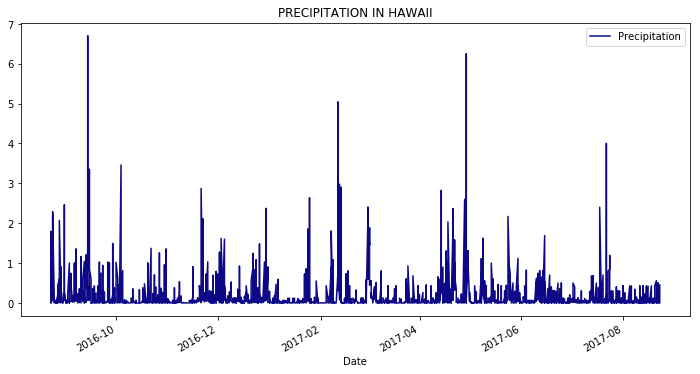

In [7]:
plot_1 = p1.plot(title='PRECIPITATION IN HAWAII', grid=False, legend=True, figsize= (12, 6), colormap='plasma')
plt.show()

In [8]:
 # Use Pandas to print the summary statistics for the precipitation data.
    
p1.describe()





,Precipitation
count,2230.000000
mean,0.171622
std,0.440621
min,0.000000
25%,0.000000
50%,0.030000
75%,0.121058
max,6.700000


## Station Analysis


 - Design a query to calculate the total number of stations.
 - Design a query to find the most active stations.
 - List the stations and observation counts in descending order
 - Which station has the highest number of observations?
 - Design a query to retrieve the last 12 months of temperature observation data (tobs).
 - Filter by the station with the highest number of observations.
 - Plot the results as a histogram with bins=12.






In [9]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect() 
engine.execute('SELECT * FROM station LIMIT 5').fetchall()


[(0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (1, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (2, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (3, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (4, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('station')

for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station


In [12]:
session = Session(engine)


In [13]:
# Design a query to calculate the total number of stations.

total_stations = session.query(Measurements).group_by(Measurements.station).count()
print("Total stations: {}".format(total_stations))



Total stations: 9


In [14]:
# Design a query to find the most active stations.
stations = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).all()

busiest_station = stations[0][0]  
total_observations = stations[0][1]
print("Busiest station:",busiest_station, total_observations)

Busiest station: USC00519281 2772


In [15]:
# List the stations and observation counts in descending order
for s, count in stations:
    print(s,count)


USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [16]:
# Which station has the highest number of observations?
print("Busiest station:",busiest_station, total_observations)

Busiest station: USC00519281 2772


In [17]:
# Query temperatures for the last year
t1 = engine.execute("select station, tobs, date from measurements where  date >= '2016-08-23'").fetchall()

In [18]:
# Filter by the station with the highest number of observations.
t1 = engine.execute("select station, tobs, date from measurements where  date >= '2016-08-23' and station = 'USC00519281'").fetchall()

In [19]:
# Plot the results as a histogram with bins=12.
plot2 = pd.DataFrame(t1, columns=['Station', 'Temperature', 'Date'])
plot2.head()


,Station,Temperature,Date
0,USC00519281,77,2016-08-23
1,USC00519281,77,2016-08-24
2,USC00519281,80,2016-08-25
3,USC00519281,80,2016-08-26
4,USC00519281,75,2016-08-27


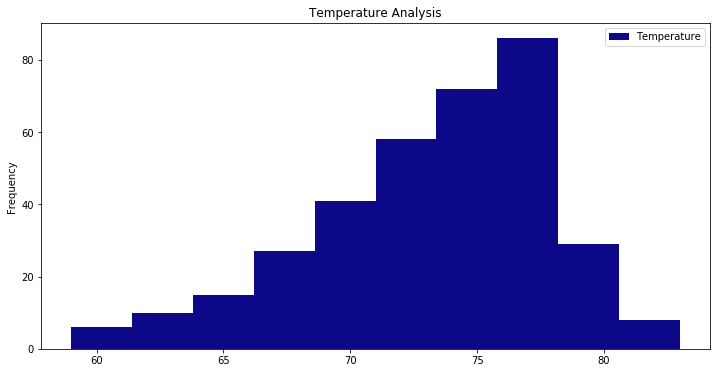

In [20]:
g = plot2.plot(kind = 'hist', title='Temperature Analysis', grid=False, legend=True, figsize= (12, 6), colormap='plasma')
plt.show()

## Temperature Analysis


 - Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
 - Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
 - Plot the min, avg, and max temperature from your previous query as a bar chart.
 - Use the average temperature as the bar height.
 - Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).






In [21]:
def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

trip = (calc_temps('2015-05-15', '2015-05-30'))
print(trip)

[(64, 72.38738738738739, 82)]


In [22]:
# Calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year

last_year = (calc_temps('2014-05-15', '2014-05-30'))


In [23]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
plot3 = pd.DataFrame(last_year, columns=['Minimum Temp','Average Temp','Maximum Temp'])
plot3.head()

,Minimum Temp,Average Temp,Maximum Temp
0,65,74.37931,81


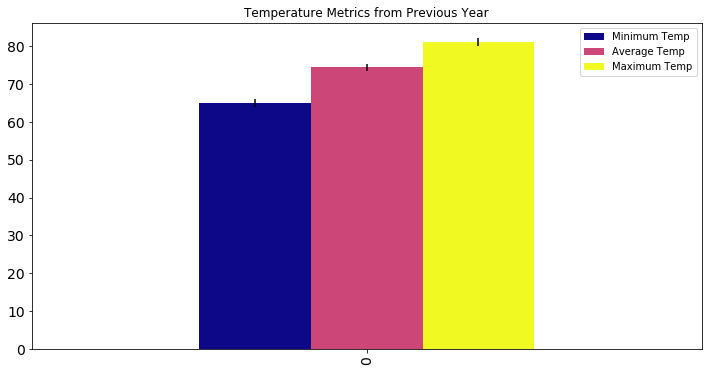

In [27]:
plot3 = plot3.transpose()
plot3.plot(title='Temperature Metrics from Previous Year', kind='bar',grid=False, legend=True, figsize= (12, 6), colormap='plasma', fontsize=14, yerr=True)
plt.show()

In [28]:
plot3['Peak to Peak'] = plot3['Maximum Temp'] - plot3['Minimum Temp'] 
plot4 = plot3.drop(columns=['Maximum Temp','Minimum Temp'])

plot4

,Average Temp,Peak to Peak
0,74.37931,16.0


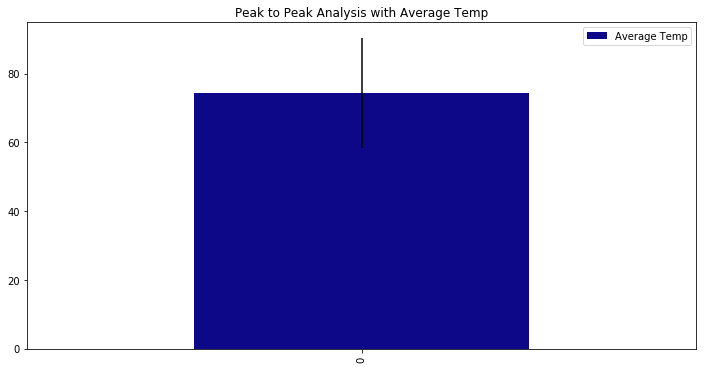

In [29]:
plot4.plot(kind = 'bar', yerr= 'Peak to Peak', title='Peak to Peak Analysis with Average Temp', colormap='plasma', figsize=(12,6))
plt.show()

## Optional Recommended Analysis

The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.


Calculate the rainfall per weather station using the previous year's matching dates.



Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.


Create a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.
Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.
Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
Use Pandas to plot an area plot (stacked=False) for the daily normals.






## Step 4 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.


Use FLASK to create your routes.



Routes



/api/v1.0/precipitation


Query for the dates and temperature observations from the last year.
Convert the query results to a Dictionary using date as the key and tobs as the value.
Return the JSON representation of your dictionary.



/api/v1.0/stations


Return a JSON list of stations from the dataset.



/api/v1.0/tobs


Return a JSON list of Temperature Observations (tobs) for the previous year



/api/v1.0/<start> and /api/v1.0/<start>/<end>


Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.





Hints


You will need to join the station and measurement tables for some of the analysis queries.
Use Flask jsonify to convert your API data into a valid JSON response object.



